In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset Description
1. ID for each pokemon
2. Name: Name of each pokemon
3. Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
4. Type 2: Some pokemon are dual type and have 2
5. Total: sum of all stats that come after this, a general guide to how strong a pokemon is
6. HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
7. Attack: the base modifier for normal attacks (eg. Scratch, Punch)
8. Defense: the base damage resistance against normal attacks
9. SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

10. SP Def: the base damage resistance against special attacks

11. Speed: determines which pokemon attacks first each round

In [3]:
data=pd.read_csv("Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
data.shape
data.drop("#",axis=1,inplace=True);

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [7]:
data["Type 2"].describe()

count        414
unique        18
top       Flying
freq          97
Name: Type 2, dtype: object

In [8]:
categorical=["Name","Type 1","Type 2"]
numerical=data.columns ^ categorical
numerical

Index(['Attack', 'Defense', 'Generation', 'HP', 'Legendary', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Total'],
      dtype='object')

In [9]:
data[numerical].describe()

,Attack,Defense,Generation,HP,Sp. Atk,Sp. Def,Speed,Total
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,79.001250,73.842500,3.32375,69.258750,72.820000,71.902500,68.277500,435.10250
std,32.457366,31.183501,1.66129,25.534669,32.722294,27.828916,29.060474,119.96304
min,5.000000,5.000000,1.00000,1.000000,10.000000,20.000000,5.000000,180.00000
25%,55.000000,50.000000,2.00000,50.000000,49.750000,50.000000,45.000000,330.00000
50%,75.000000,70.000000,3.00000,65.000000,65.000000,70.000000,65.000000,450.00000
75%,100.000000,90.000000,5.00000,80.000000,95.000000,90.000000,90.000000,515.00000
max,190.000000,230.000000,6.00000,255.000000,194.000000,230.000000,180.000000,780.00000


In [10]:
data[categorical].describe().head(4)

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


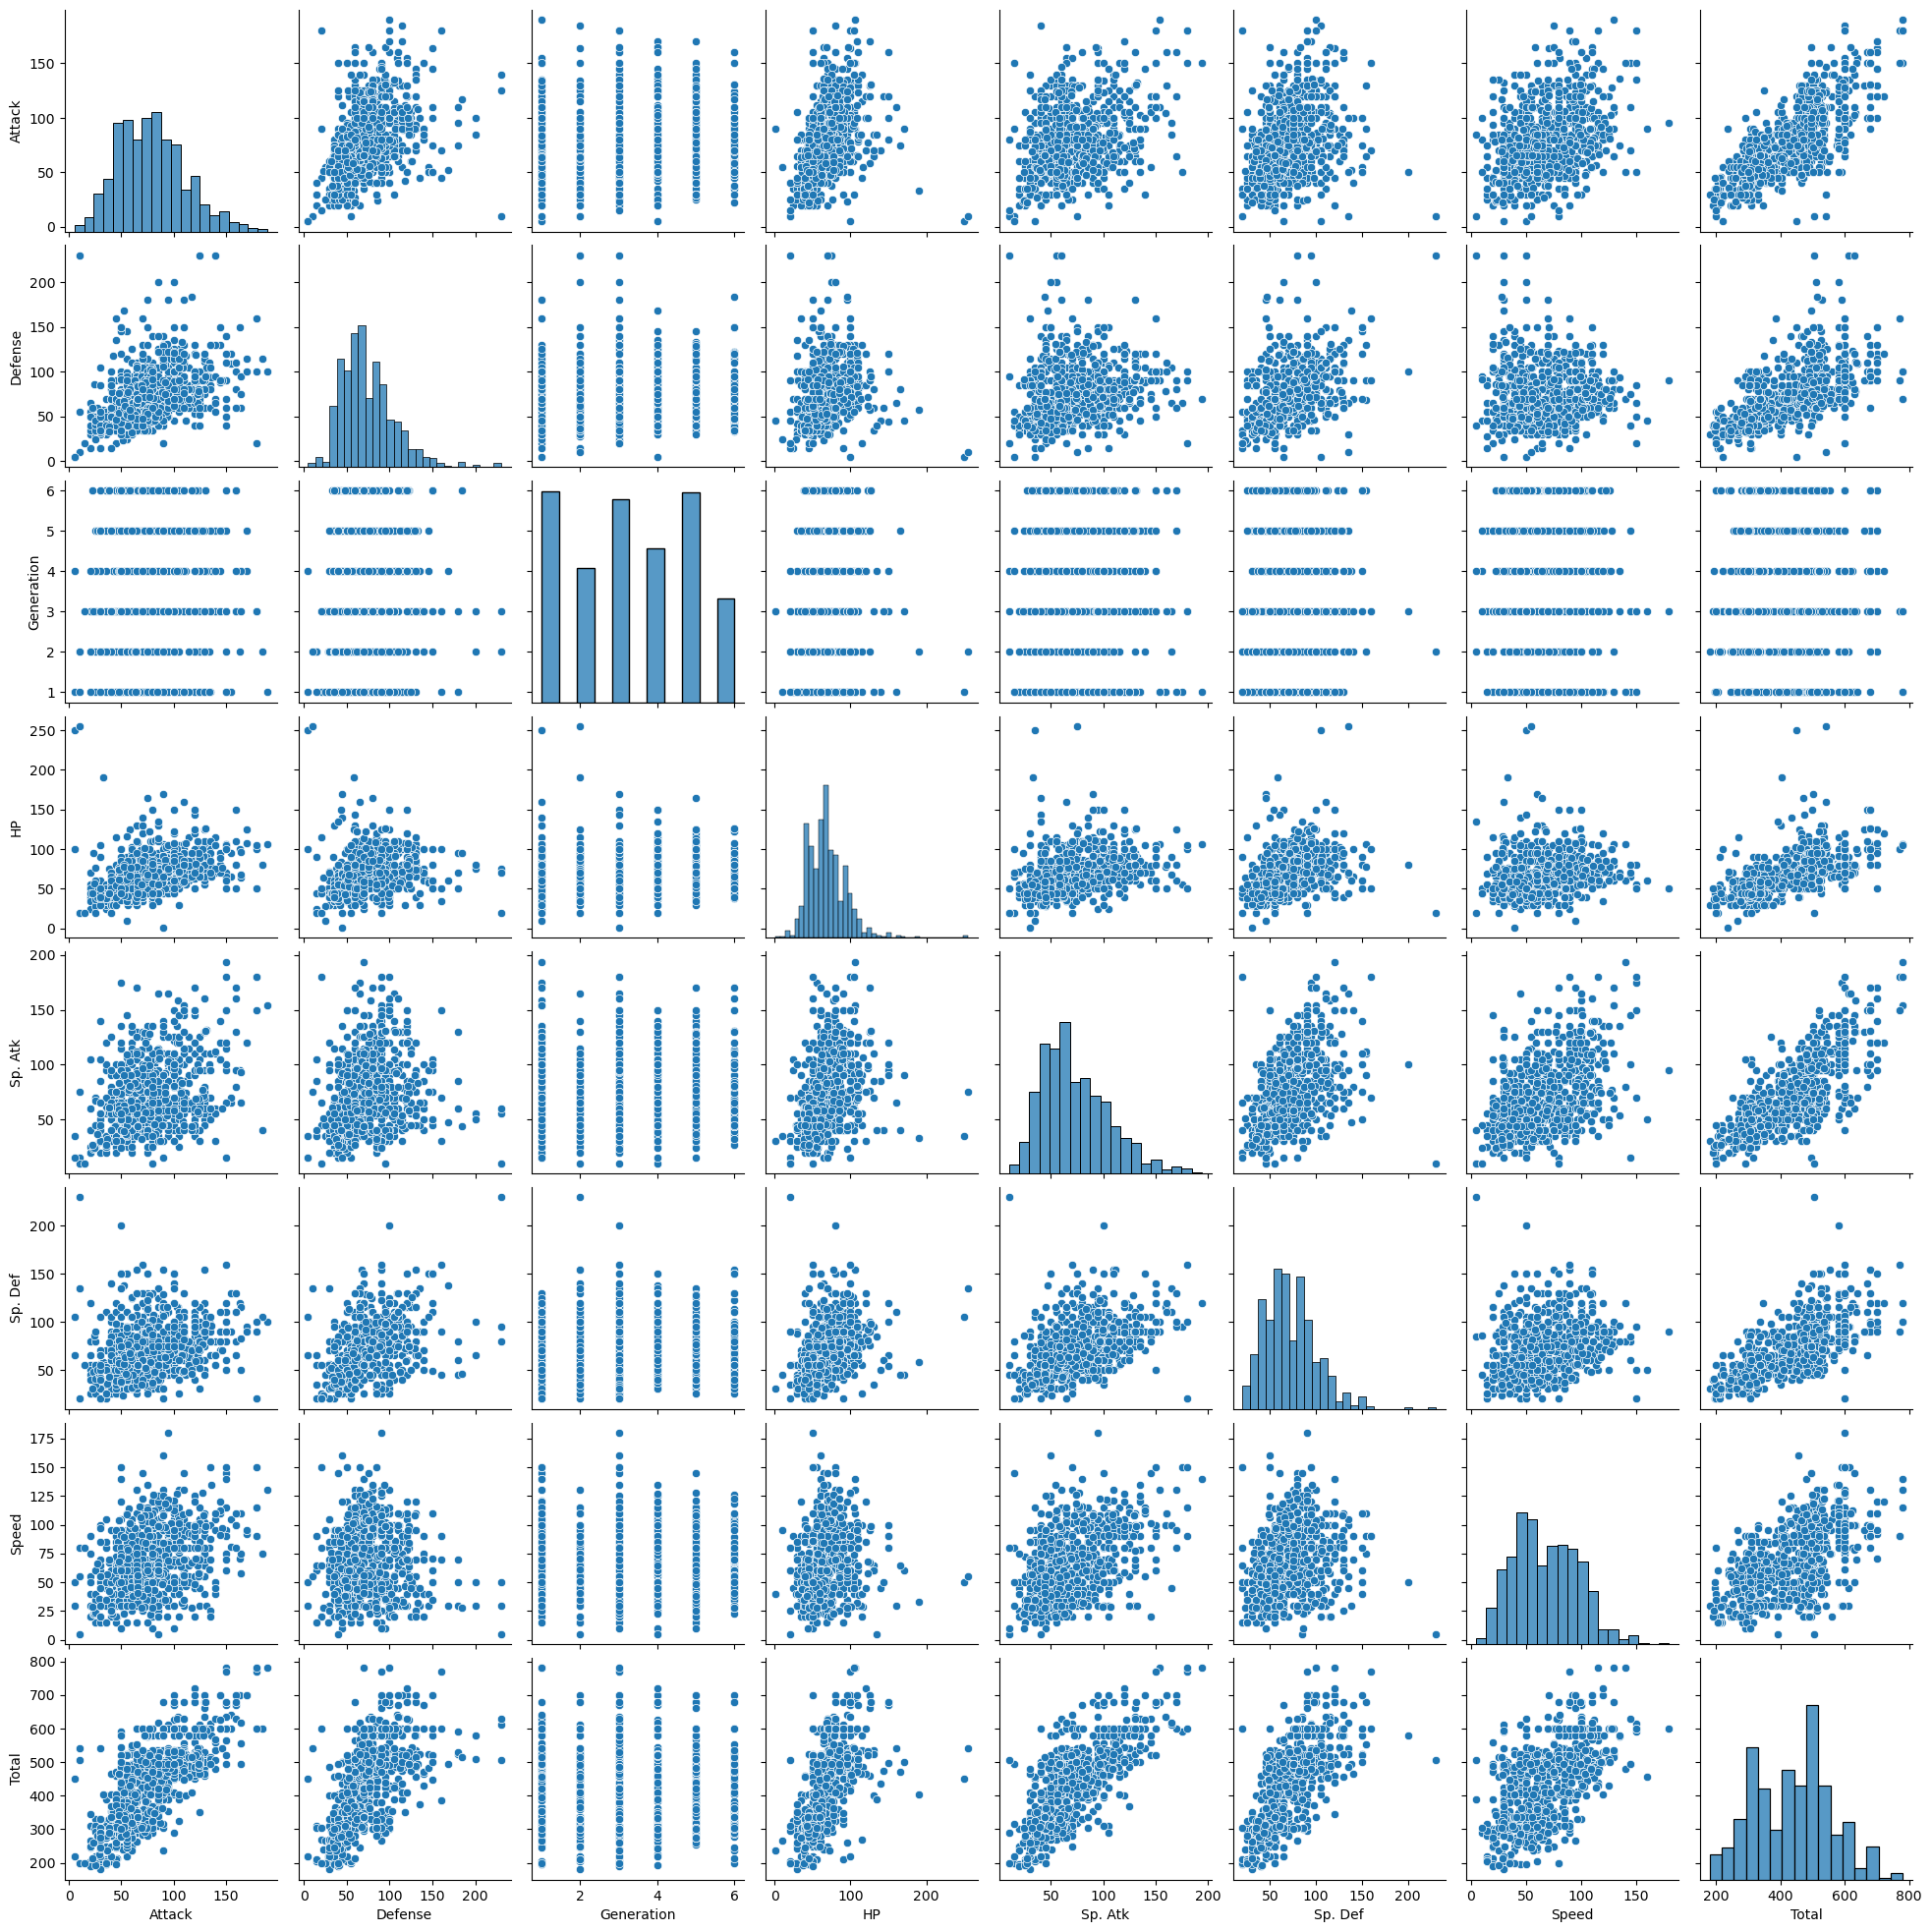

In [11]:
cols=list(numerical)
cols.remove("Legendary")

sns.pairplot(data[cols])

# Type 1

Text(0.5, 1.0, 'Type_1')

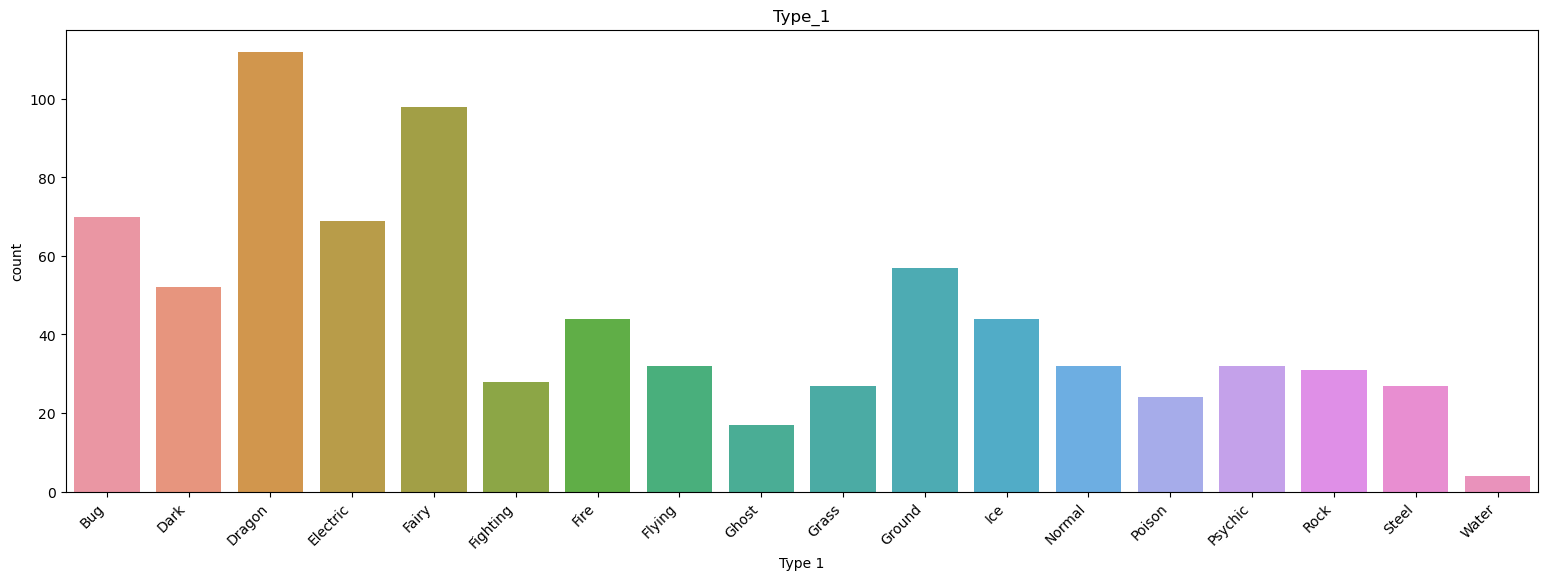

In [12]:
fig,ax=plt.subplots(1,1,figsize=(19,6))
df=data.sort_values(by='Type 1', ascending=False)

sns.countplot(data["Type 1"])
ax.set_xticks(range(len(np.unique(data["Type 1"].values))))
ax.set_xticklabels(np.unique(data["Type 1"].values), rotation=45, ha='right')
ax.set_title('Type_1')

# Type 2

Text(0.5, 1.0, 'Type_2')

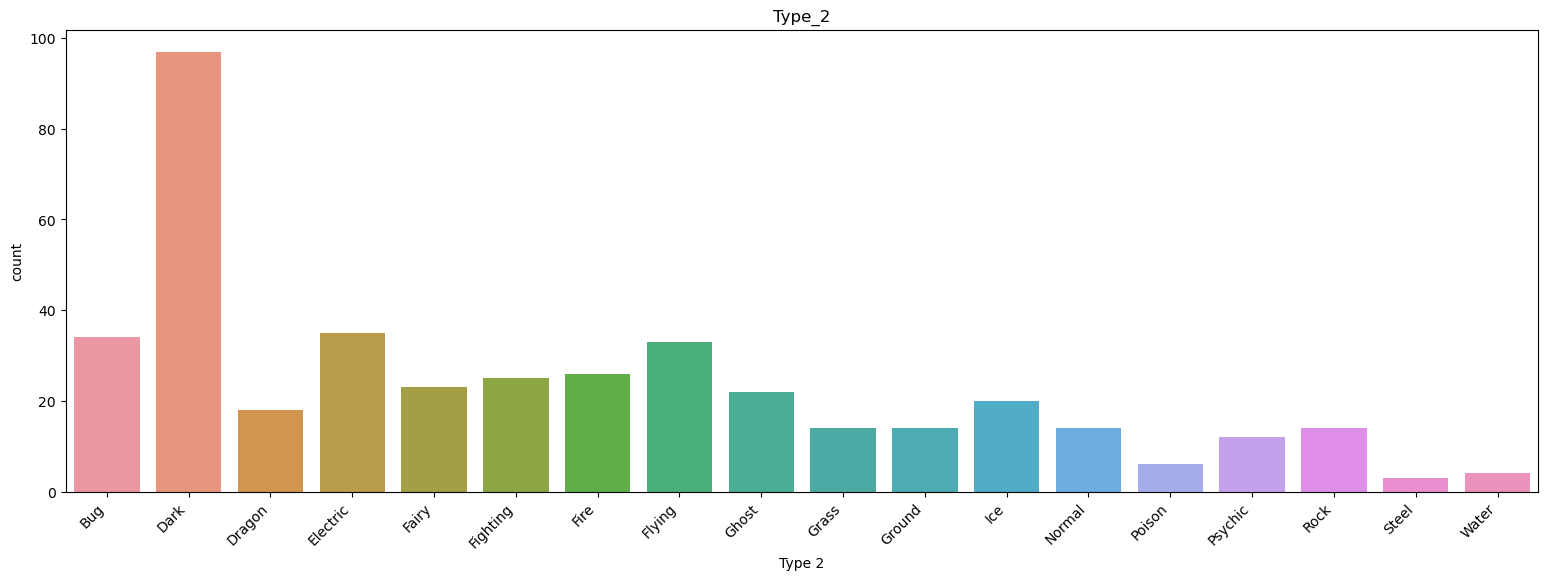

In [13]:
fig,ax=plt.subplots(1,1,figsize=(19,6))
sns.countplot(data["Type 2"].dropna())
ax.set_xticks(range(len(np.unique(data["Type 2"].dropna().values))))
ax.set_xticklabels(np.unique(data["Type 2"].dropna().values), rotation=45, ha='right')
ax.set_title('Type_2')

# Attack and Special Attack

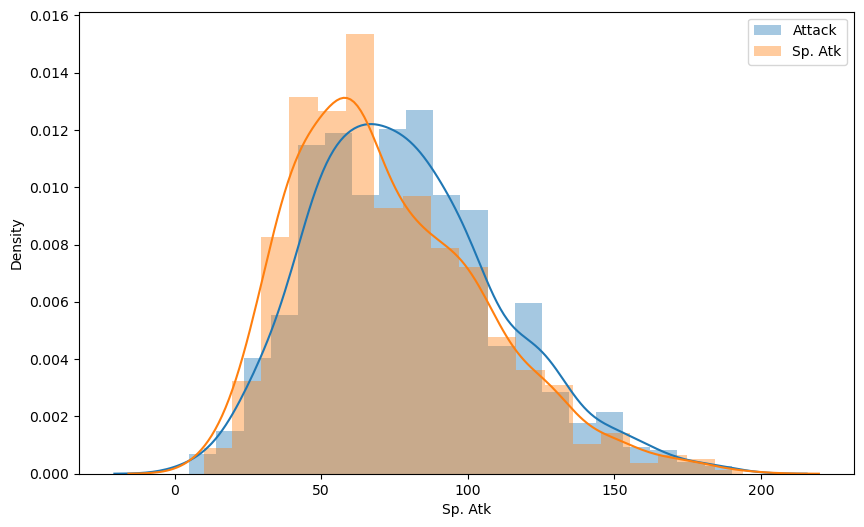

In [14]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Attack"],label="Attack")
sns.distplot(data["Sp. Atk"],label="Sp. Atk")
plt.legend()

# Defence and Special Defence

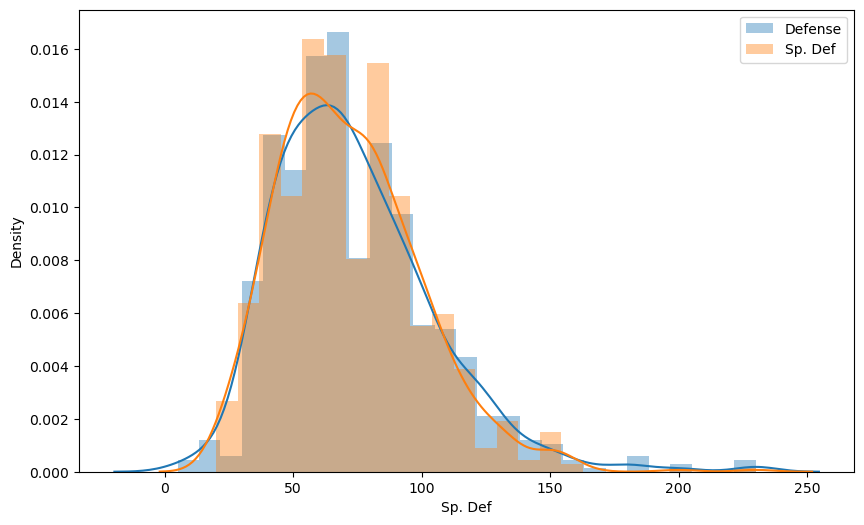

In [15]:
fig=plt.figure(figsize=(10,6))
sns.distplot(data["Defense"],label="Defense")
sns.distplot(data["Sp. Def"],label="Sp. Def")
plt.legend()

# Speed and HP

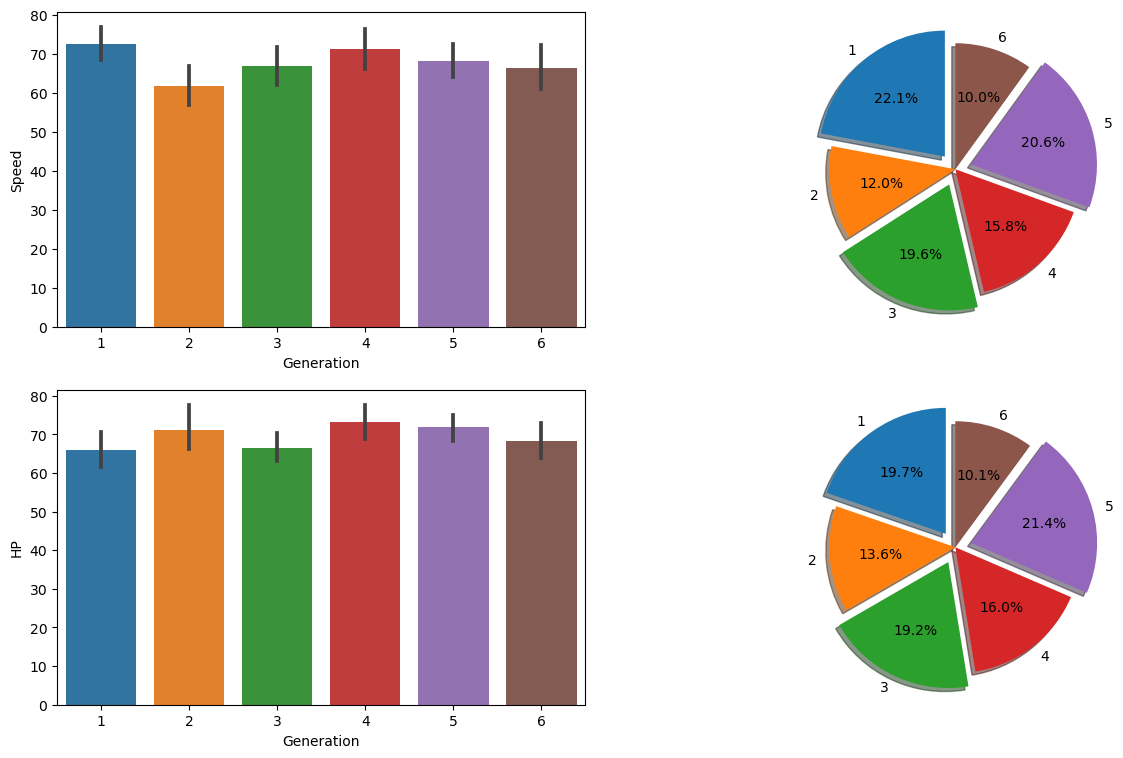

In [16]:
fig,ax=plt.subplots(2,2,figsize=(15,9))
sns.barplot(x=data["Generation"],y=data["Speed"],ax=ax[0][0])
ax[0][0].set_xlabel("Generation")
ax[0][0].set_ylabel("Speed")

sns.barplot(x=data["Generation"],y=data["HP"],ax=ax[1][0])
ax[1][0].set_xlabel("Generation")
ax[1][0].set_ylabel("HP")




df=data.copy()
df=df.groupby(["Generation"]).sum()

labels =range(1,7)
colors = sns.color_palette() 
explode =(0.13,0,0.13,0,0.13,0) 

ax[0][1].pie(100.0*df["Speed"]/sum(df["Speed"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True); 
ax[1][1].pie(100.0*df["HP"]/sum(df["HP"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True); 

# Total Power and Legendary

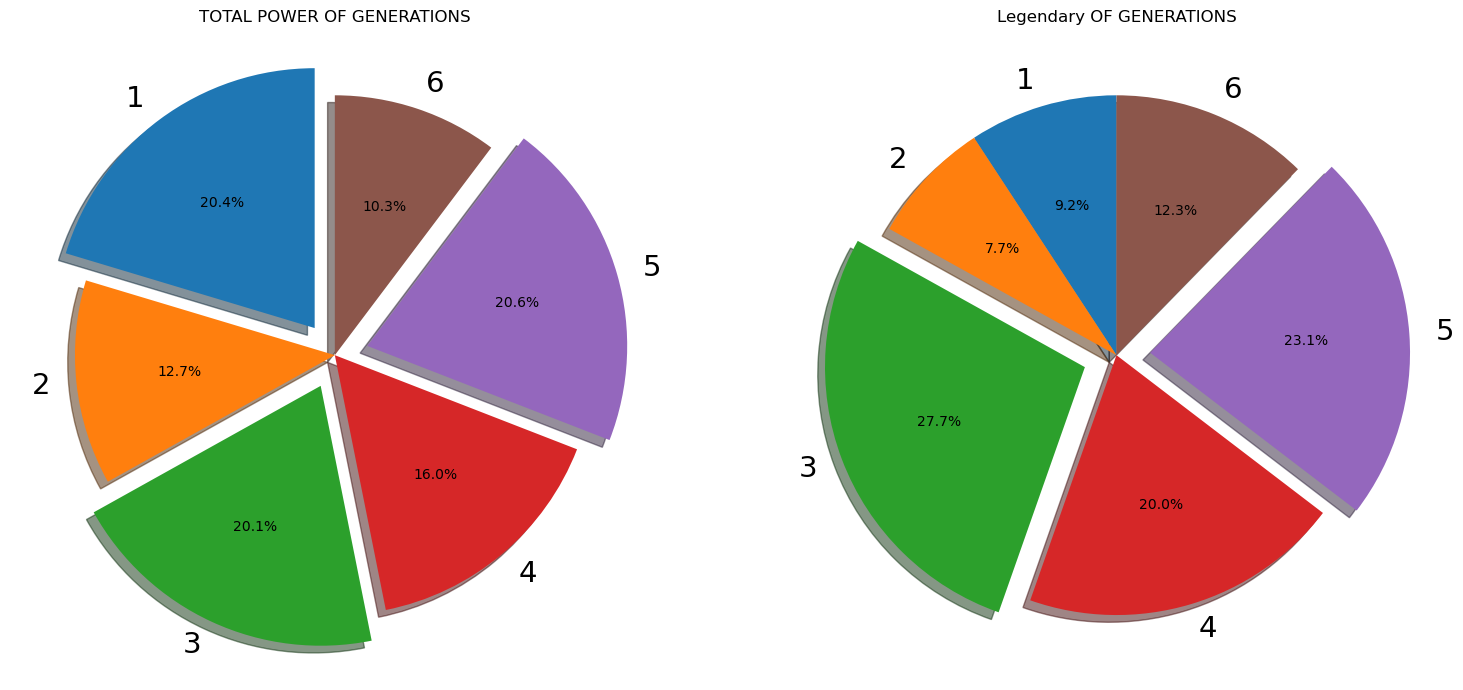

In [17]:
df=data.copy()
df=df.groupby(["Generation"]).sum()
fig,ax=plt.subplots(1,2,figsize=(16,7))

labels =range(1,7)
colors = sns.color_palette() 
explode =(0.13,0,0.13,0,0.13,0) 
# fig, ax1 = plt.subplots(figsize = (19,6)) 
patches, texts, autotexts=ax[0].pie(100.0*df["Total"]/sum(df["Total"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
[ i.set_fontsize(21) for i in texts]

ax[0].set_title("TOTAL POWER OF GENERATIONS")
explode =(0,0,0.13,0,0.13,0) 

patches, texts, autotexts=ax[1].pie(100.0*df["Legendary"]/sum(df["Legendary"]), labels=labels,explode=explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True) 
ax[1].set_title("Legendary OF GENERATIONS")
[ i.set_fontsize(21) for i in texts]

plt.tight_layout() 
plt.show()
# df

1. Top 3 in power are Generations 1,3,5
2. Top 3 in Legendary are Generations 3 and 5


let's have a look at quatitave data like Attack,Defense,HP,Sp.Atk,Sp.Def and Speed.

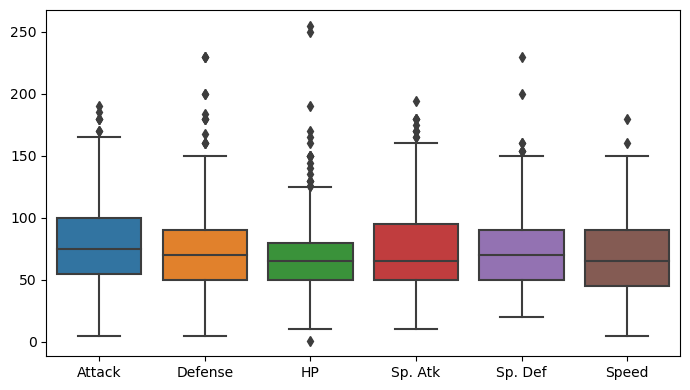

In [18]:
fig,ax=plt.subplots(1,1,figsize=(7,4))

cols=list(numerical)
cols.remove("Generation")
cols.remove("Legendary")
cols.remove("Total")
sns.boxplot(data=data[cols]);
plt.tight_layout()
# cols

1. Here, It shows there are many outliers in our data.
2. If you look over hp it have outlier of low and high both.
3. Hp also have highest outlier.
4. Thus our data also seem to have large variance.

Let's plot these qunatiative data  over each generations

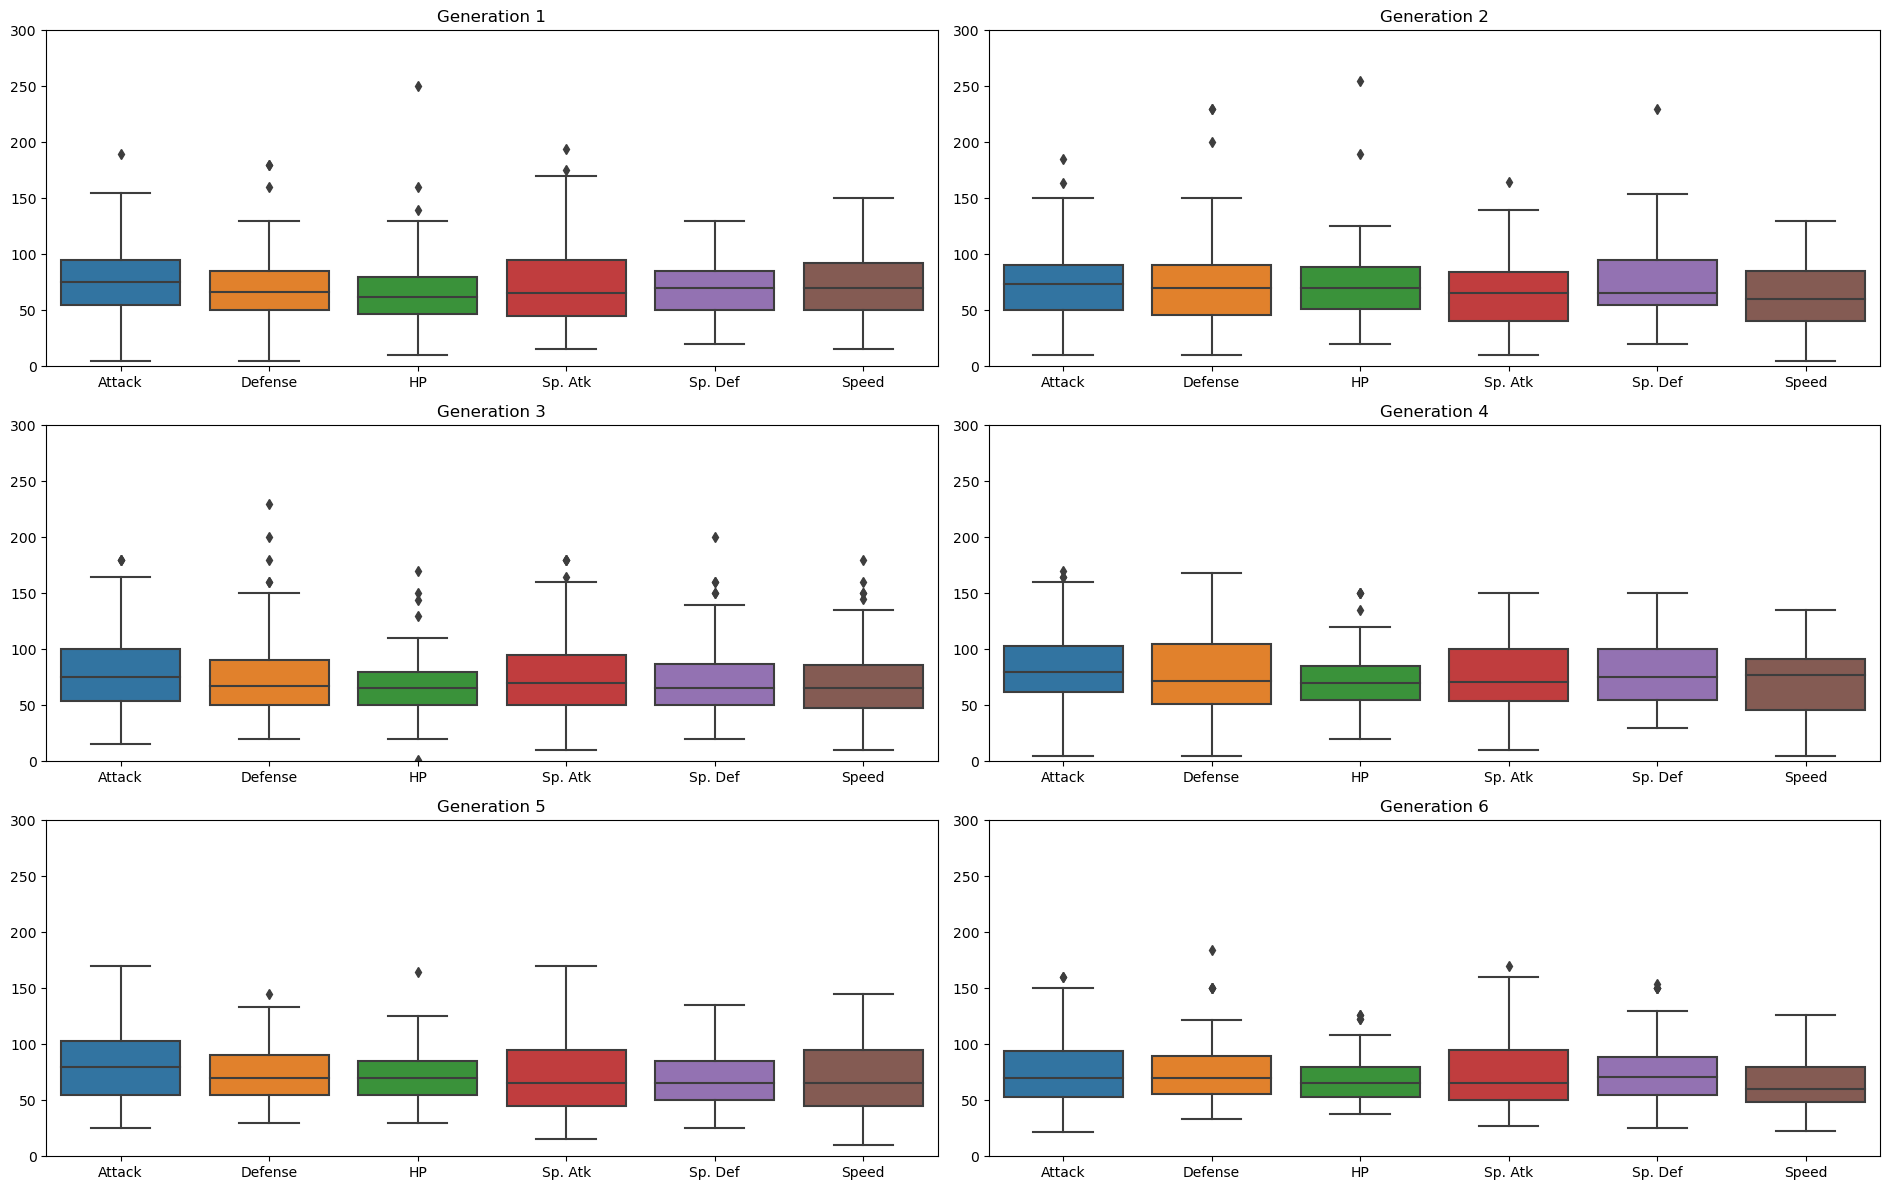

In [19]:
fig,ax=plt.subplots(3,2,figsize=(19,12))
index=1
for i in range(3):
  for j in range(2):
    df=data.loc[data["Generation"]==index]
    sns.boxplot(data=df[cols],ax=ax[i][j])
    ax[i][j].set_title("Generation "+str(index))
    ax[i][j].set_ylim([0,300])
    index+=1
plt.tight_layout()

Here it seems Generation 1,3,5 are seems to have high variance in sp.attack,speed,hp .

# TOP 3

Now let's see top 3 Pokemons from each generation

In [21]:
df=data.groupby(["Generation"])
temp=df["Total"].max()
best=[]
index=1
for i in [1,3,5]:
  best.append(data.loc[(data["Total"]==temp[i]) & (data["Generation"]==i)].head(1))
  
top3_total=pd.concat([data.iloc[best[0].index[0]],data.iloc[best[1].index[0]],data.iloc[best[2].index[0]]],axis=1).transpose()
top3_total

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
711,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True


![]('mewto.png')